## Unsupervised Machine Learning -Kmeans, Hierarchical Clustering**

### What is mean by Unsupervised Machine Learning ?**

**In Unsupervised Learning We are not interested in prediction, because we do not have an associated response variable Y .Unsupervised learning cannot be directly applied to a regression or classification problem because unlike supervised learning,
we have the input data but no corresponding output data. The goal of unsupervised learning is to find the underlying structure of dataset, group that data according to similarities, and represent that dataset in a compressed format.**

### Clustering

**Clustering refers to a very broad set of techniques for finding subgroups, or clustering clusters, in a data set.
When we cluster the observations of a data set, weseek to partition them into distinct groups so that the observations within
each group are quite similar to each other, while observations in different groups are quite different from each other.**

### K-means Clustering

**K-means clustering is a simple and elegant approach for partitioning a data set into K distinct, non-overlapping clusters.
To perform K-means clustering, we must first specify the desired number of clusters K; then the K-means algorithm will assign
each observation to exactly one of the K clusters.**

**Steps to perform K-means**
**1)Choosing the number of clusters.**  
**2)Initializing centroids.**  
**3)Assign data points to the nearest cluster.**  
**4)Re-initialize centroids.**  
**5)Repeat steps 3 and 4.**  


**Performing k_means Clustering**

**Importing Libraries**

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df1=pd.read_csv('UsArrests.csv')
df1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


**Dataset Information**

**This dataset contains statistics, in arrests per 100,000 residents for Assault, Murder and Rape in each of the 50 US States 
in 1973.Also given in the percent of the population living in Urban Area.**

**Assault:- Numeric Assaults Arrests(per 10,000)**  
**Murder :- Numeric Murder Arrests(per 10,000)**  
**Urban population :- Numeric Percent Urban Population.**  
**Rape :- Numeric Rape Arrests.**

In [3]:
## Here we have to rename Unnamed column by State because it make no sense
data=df1.rename(columns={'Unnamed: 0':'State'})
data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


**Performing EDA**  
**Bar Chart of Murder and Rape.**

<AxesSubplot:xlabel='State'>

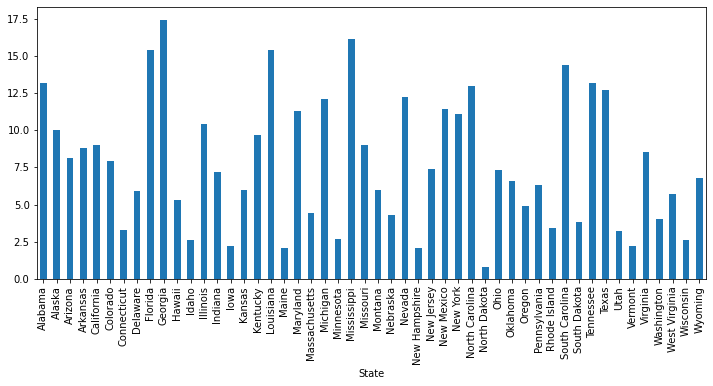

In [4]:
plt.figure(figsize=(12,5))
data.groupby('State')['Murder'].max().plot(kind='bar')

**From the graph we observed that**  
**Highest Murder Rate observed in Georgia and Missisippi.
Lowest Murder Rate observed in Idaho , Iowa, Maine, New Hampshire, North Dakota, Vermont and Wisconsin.**


<AxesSubplot:xlabel='State'>

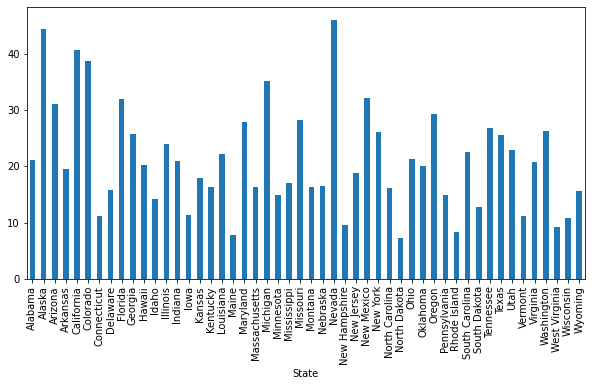

In [5]:
plt.figure(figsize=(10,5))
data.groupby('State')['Rape'].max().plot(kind='bar')

**From the above graph we observed that the The highest Rape rate in 'Nevada','Alaska' and
Lowest Rape rate in 'Maine','North Dakota' and so on.**

In [6]:
df1.isnull().sum()    #To check null value in given data.

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

**Scatterplot of all variables**

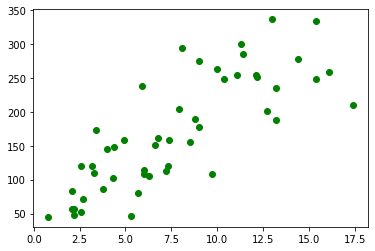

In [7]:
plt.scatter(df1.Murder,df1['Assault'],color='green')

**In the above scatterplot,it is difficult to find clusters.Hence we used elbow curve to choose what is the value of k?**

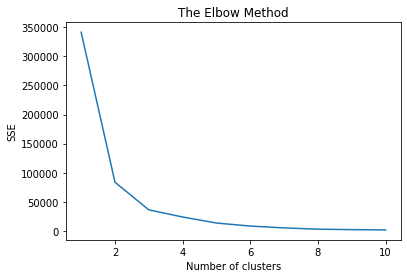

In [12]:
#for choosing k
sse=[]
k_rng=range(1,11)
for k in k_rng:
    km=KMeans(n_clusters=k,init='k-means++',random_state=42)
    km
    km.fit(X)
    sse.append(km.inertia_)
plt.plot(range(1, 11), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
    

**From the above graph we see that elbow curve is bent at k=3, Hence we choose k=3.**

In [14]:
X=df1.iloc[:,[1,2]].values   #Extract 2 columns Murder,Assaults.
clusters = km.labels_

In [10]:
km=KMeans(n_clusters=3,init='k-means++',random_state=10)
y_kmeans=km.fit_predict(X)
y_kmeans


array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0])

In [11]:
km.cluster_centers_    # This are the centroid of 3 clusters

array([[  8.21428571, 173.28571429],
       [  4.27      ,  87.55      ],
       [ 11.8125    , 272.5625    ]])

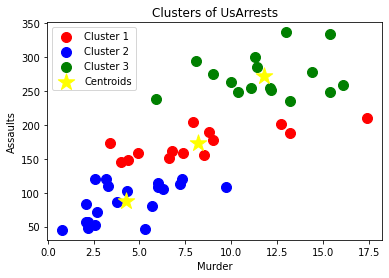

In [17]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'Yellow', marker='*',label = 'Centroids')
plt.title('Clusters of UsArrests')
plt.xlabel('Murder')
plt.ylabel('Assaults')
plt.legend()
plt.show()

**Here murder and Assault are classified by k_means clustering . The Yellow star denotes the centroid calculate distance 
from each of the points**  
**From the plot we see that Red dots forms Cluster 1 i.e. 0 points. Blue dots forms Cluster 2, i.e. 1 points and Blue dots forms Cluster 3, i.e. 2 Points.None of the observation is Misclassify**

### Hierarchical clustering Analysis

**One potential disadvantage of K-means clustering is that it requires us to pre-specify the number of clusters K. 
Hierarchical clustering is an alternative approach which does not require that we commit to a particular choice of K. 
Hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based 
representation of the observations, called a dendrogram.**  
**There are two types of Hierarchical Clustering.**   
**1)Agglomerative Hierarchical Clustering.**  
**2) Divisive Hierarchical Clustering**

**1)Agglomerative Hierarchical Clustering.**  
**It is Bottom Up approach where each observation starts in its own clusters are merged as one moves up hierarchy.**

**Linkage Criterion**  
**1) Single-Linkage:- Single linkage is the shortest distance between a pair of observations in two clusters.**

In [19]:
data_1= data.iloc[:,[1,2]].values   # Take 4 columns Murder,Assaults,Urban population and rape.
scaled_data_1 = scaler.fit_transform(data_1)

Text(0, 0.5, 'Euclidean distances')

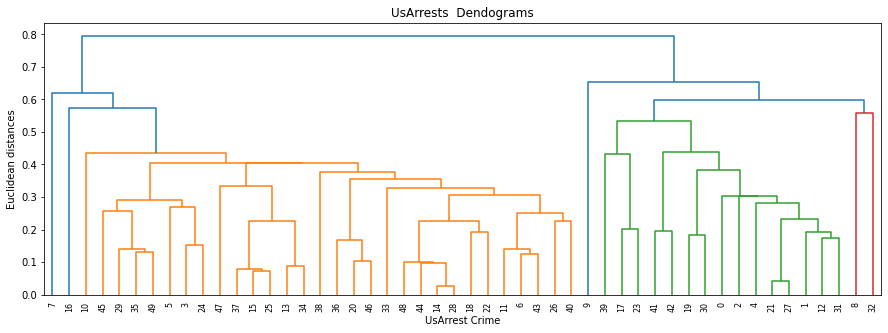

In [31]:
plt.figure(figsize=(15,5))
plt.title("UsArrests  Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data_1, method='single'))
plt.xlabel('UsArrest Crime')
plt.ylabel('Euclidean distances')

**Single linkage will produce the dendograms which are not in structured manner.**

##The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. 
The linkage method takes the dataset and the method to minimize distances as parameters.**

**2) Complete-Linkage :- Complete linkage is the farthest linkage is the farthest distance between a pair of observations 
in two clusters.**

Text(0, 0.5, 'Euclidean distances')

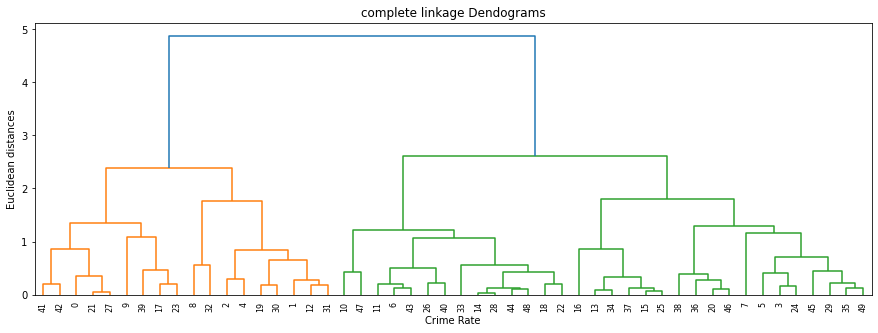

In [21]:
plt.figure(figsize=(15,5))
plt.title("complete linkage Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data_1, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

**3) Average-Linkage:- Average linkage is the distance between each observation in one cluster to every observation 
    in other clusters**

Text(0, 0.5, 'Euclidean distances')

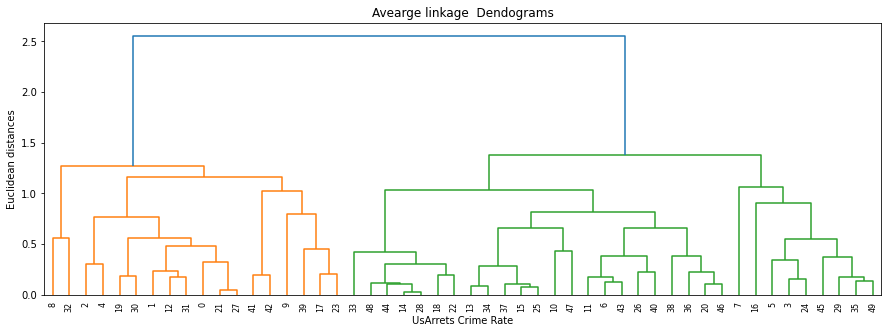

In [32]:
plt.figure(figsize=(15,5))
plt.title("Avearge linkage  Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data_1, method='average'))
plt.xlabel('UsArrets Crime Rate')
plt.ylabel('Euclidean distances')

**The Average linkage produce dendogram which are in tree manner**

**4)Ward's-linkage :- It is a mininum variance method that calculates the distance between two clusters as increase in the 
minimum sum of squares after merging the two clusters into single clusters.**  
**Ward's Linakge criteria is the default option.to choose linkage criterion.**

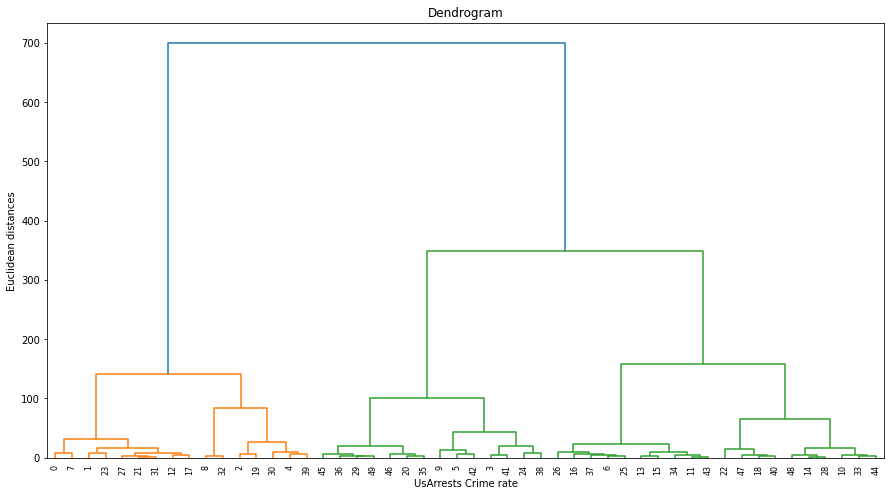

In [33]:
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(data_1, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('UsArrests Crime rate')
plt.ylabel('Euclidean distances')
plt.show()


**We can extract the optimal number of clusters by looking the dendogram.By looking the dendogram, we say that optimal no of 
clusters is 3**

### Fit the model

In [24]:
# Fit the Agglomerative Clustering
 
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [25]:
# Fit and predict to have the cluster labels.

y_pred =AC.fit_predict(data_1)
y_pred
#y_pred1=np.array(y_pred).tolist()

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [29]:
ac=np.sum(y_pred==AC)/len(data_1)
print(ac)

0.0


In [26]:
data_1['cluster labels']= y_pred
# Let's see which State falls in which cluster
#data_1[['State','cluster labels']]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y_pred', y='Murder', data=data_1)

AttributeError: 'numpy.ndarray' object has no attribute 'get'

<Figure size 720x360 with 0 Axes>

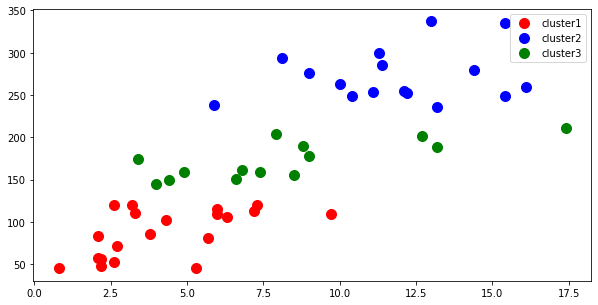

In [69]:
plt.figure(figsize=(10,5))
plt.scatter(data_1[y_pred==0, 0], data_1[y_pred==0, 1], s=100, c='red', label ='cluster1')
plt.scatter(data_1[y_pred==1, 0], data_1[y_pred==1, 1], s=100, c='blue', label ='cluster2')
plt.scatter(data_1[y_pred==2, 0], data_1[y_pred==2, 1], s=100, c='green', label ='cluster3')
 #plt.xlabel('Murder Rate')
#plt.ylabel('Assault Rate')
plt.legend()
plt.show()

**Here we can visualize the three clusters here.**  
**Murder and Assault are classified by Hierarchical clustering.**  
**From the plot we see that Red dots forms Cluster 1 i.e. 0 points. Blue dots forms Cluster 2, i.e. 1 points
and Blue dots forms Cluster 3, i.e. 2 Points.**
